<a href="https://colab.research.google.com/github/MATEN0920/ML/blob/master/%EC%86%8C%EB%B0%A9%EB%8D%B0%EC%9D%B4%ED%84%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#gpu_info = !nvidia-smi
#gpu_info = '\n'.join(gpu_info)
#if gpu_info.find('failed') >= 0:
#  print('Not connected to a GPU')
#else:
#  print(gpu_info)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
old_bldg=pd.read_csv('drive/MyDrive/data/서울시 30년 이상 노후주택 분포현황.csv', encoding='utf-8')
old_bldg['노후주택수']=old_bldg['주택수(호)'].str.replace(',', '').astype(int)
old_bldg=old_bldg.drop('주택수(호)',axis=1)
old_bldg=old_bldg.drop('시도명',axis=1)
old_bldg=old_bldg.drop('비율(%)',axis=1)
old_bldg

,시군구명,노후주택수
0,노원구,87236
1,강남구,52886
2,송파구,50953
3,양천구,47689
4,도봉구,40033
5,영등포구,31441
6,강서구,28798
7,강북구,28719
8,구로구,27097
9,관악구,26870


In [5]:
low_income=pd.read_csv('drive/MyDrive/data/서울시 기초생활보장 수급권자 현황.csv', encoding='cp949')
low_income = low_income.rename(columns={
    '시도':'시도명',
    '시군구':'시군구명',
    '수급권자수': '기초생활수급자수',
})
low_income=low_income.drop('수급가구수',axis=1)
low_income=low_income.drop('시도명',axis=1)
low_income=low_income.sort_values('기초생활수급자수', ascending=False)
low_income

,시군구명,기초생활수급자수
15,강서구,34159
10,노원구,33170
6,중랑구,30362
11,은평구,27899
20,관악구,25535
8,강북구,25323
23,송파구,19824
14,양천구,19732
24,강동구,19358
7,성북구,18523


In [6]:
old_safe=pd.read_csv('drive/MyDrive/data/서울시 노인장애인 보호구역 표준데이터.csv', encoding='cp949')
old_safe.head()

,시도명,시군구명,소재지도로명주소,위도,경도
0,서울특별시,관악구,서울특별시 관악구 남현길 43,37.474765,126.976814
1,서울특별시,관악구,서울특별시 관악구 당곡6길 37,37.492221,126.929438
2,서울특별시,관악구,서울특별시 관악구 봉천로23라길 15,37.488441,126.937233
3,서울특별시,관악구,서울특별시 관악구 남부순환로234길 37,37.477696,126.956795
4,서울특별시,관악구,서울특별시 관악구 관악로6길 50,37.476276,126.953510


In [7]:
old_safe_counts = old_safe.groupby(['시도명', '시군구명']).size().reset_index(name='노인,장애인 보호시설수')
old_safe_counts = old_safe_counts.drop('시도명', axis=1)
old_safe_counts = old_safe_counts.sort_values(by='노인,장애인 보호시설수', ascending=False)
old_safe_counts

,시군구명,"노인,장애인 보호시설수"
15,송파구,26
0,강남구,19
4,관악구,16
3,강서구,14
12,서초구,14
1,강동구,12
19,은평구,12
9,동작구,9
8,동대문구,9
16,양천구,7


In [8]:
alone_old=pd.read_csv('drive/MyDrive/data/서울시 독거노인 화재안전취약성.csv', encoding='utf-8')
alone_old=alone_old.drop('시도명',axis=1)
alone_old.head()

,시군구명,화재발생건수,월평균화재발생건수,전체노후건축물비율,주거노후건축물비율,독거노인가구비율,독거노인가구수,기초수급인구수,기초수급노인인구수,총인구수,전체노인인구수,양로시설수,노인공동생활가정시설수,노인복지주택시설수,노인요양시설수,노인요양공동생활가정시설수,노인복지관시설수,경로당수,노인교실수
0,강남구,275,22.916667,30.3,30.2,5.5,11593,10495,4218,533042,78078,0,0,2,4,3,6,167,22
1,강동구,168,14.000000,36.8,21.7,6.8,12532,9955,3699,462664,73943,1,0,1,8,16,3,121,10
2,강북구,127,10.583333,31.9,29.6,10.6,13860,14368,5687,299182,64218,0,0,0,8,23,1,100,17
3,강서구,173,14.416667,15.1,15.7,7.2,18123,19913,8450,574315,92336,1,0,2,18,13,5,218,25
4,관악구,212,17.666667,23.4,21.6,6.0,15039,14150,5311,485699,79371,0,0,0,10,18,1,114,19


In [9]:
# 비율 계산해서 새 컬럼으로 추가
alone_old['노인인구비율(%)'] = (alone_old['전체노인인구수'] / alone_old['총인구수']) * 100

# 소수점 두 자리로 보기
alone_old['노인인구비율(%)'] = alone_old['노인인구비율(%)'].round(2)

# '노인인구비율' 컬럼 기준으로 내림차순 정렬
alone_old_sorted = alone_old.sort_values(by='노인인구비율(%)', ascending=False)

# 결과 확인 (상위 5개만 예시)
alone_old_sorted[['시군구명', '노인인구비율(%)']]

,시군구명,노인인구비율(%)
2,강북구,21.46
9,도봉구,20.20
23,중구,19.62
22,종로구,19.08
24,중랑구,18.47
21,은평구,18.39
10,동대문구,18.38
6,구로구,18.01
13,서대문구,17.66
7,금천구,17.52


In [10]:
# old_ratio에 저장 (시군구명과 노인인구비율만)
old_ratio = alone_old_sorted[['시군구명', '노인인구비율(%)']].copy()

# 결과 확인
print(old_ratio.head())


   시군구명  노인인구비율(%)
2   강북구      21.46
9   도봉구      20.20
23   중구      19.62
22  종로구      19.08
24  중랑구      18.47


In [11]:
fore=pd.read_csv('drive/MyDrive/data/서울시 등록외국인 총합.csv', encoding='utf-8')
fore = fore.rename(columns={
    '시군구':'시군구명',
    '등록외국인총합':'외국인수'
})
fore=fore.drop('시도',axis=1)
fore = fore.sort_values(by='외국인수', ascending=False)
fore

,시군구명,외국인수
6,구로구,24209
19,영등포구,23778
10,동대문구,19727
4,관악구,18146
5,광진구,16726
13,서대문구,16142
7,금천구,14019
16,성북구,13189
20,용산구,13132
11,동작구,11350


In [12]:
child_safe=pd.read_csv('drive/MyDrive/data/서울시 어린이 보호구역 표준데이터.csv', encoding='utf-8')
child_safe=child_safe.drop('시도명',axis=1)
child_safe.head()

,시설종류,시군구명,소재지도로명주소,위도,경도
0,어린이집,마포구,서울특별시 마포구 와우산로37길 16,37.556236,126.930128
1,어린이집,마포구,서울특별시 마포구 신촌로20길 15,37.554602,126.938436
2,유치원,마포구,서울특별시 마포구 백범로1길 56,37.554918,126.939295
3,초등학교,마포구,서울특별시 마포구 와우산로23길 20-27,37.554889,126.924379
4,초등학교,마포구,서울특별시 마포구 양화로3길 94,37.553410,126.910950


In [13]:
child_safe_counts = child_safe.groupby(['시군구명']).size().reset_index(name='어린이 보호시설수')
child_safe_counts = child_safe_counts.sort_values(by='어린이 보호시설수', ascending=False)
child_safe_counts

,시군구명,어린이 보호시설수
8,노원구,116
17,송파구,98
16,성북구,97
0,강남구,93
14,서초구,92
3,강서구,88
1,강동구,84
10,동대문구,76
9,도봉구,70
4,관악구,69


In [14]:
rescue_2022=pd.read_csv('drive/MyDrive/data/서울시_대화재사고_구조출동_2022.csv', encoding='utf-8')
rescue_2023=pd.read_csv('drive/MyDrive/data/서울시_대화재사고_구조출동_2023.csv', encoding='utf-8')
rescue_2024=pd.read_csv('drive/MyDrive/data/서울시_대화재사고_구조출동_2024.csv', encoding='utf-8')

print(rescue_2022.head())
print(rescue_2023.head())
print(rescue_2024.head())

  사고원인명 처리결과구분명        신고일자    신고시각        출동일자    출동시각      현장도착일자  현장도착시각  \
0    화재    안전조치  20220101.0  2023.0  20220101.0  2000.0  20220101.0  2400.0   
1    화재    안전조치  20220101.0  2023.0  20220101.0  2000.0  20220101.0  2400.0   
2    화재    안전조치  20220101.0  2023.0  20220101.0  2000.0  20220101.0  2400.0   
3    화재    안전조치  20220101.0  2023.0  20220101.0  2000.0  20220101.0  2500.0   
4    화재    안전조치  20220101.0  2023.0  20220101.0  2000.0  20220101.0  2400.0   

       구조완료일자  구조완료시각        복귀일자     복귀시각  현장시도명 현장시군구명     손상지역경도  \
0         NaN     NaN  20220101.0  10000.0  서울특별시    도봉구  127.04306   
1  20220101.0  2800.0  20220101.0   4000.0  서울특별시    도봉구  127.04306   
2  20220101.0  2600.0  20220101.0   4000.0  서울특별시    도봉구  127.04306   
3  20220101.0  2800.0  20220101.0   4000.0  서울특별시    도봉구  127.04306   
4  20220101.0  5000.0  20220101.0  10000.0  서울특별시    도봉구  127.04306   

      손상지역위도  현장거리   소방서명  
0  37.654835   NaN  도봉소방서  
1  37.654835   NaN  도봉소방서  
2  37.654835  

In [15]:
rescue_counts_22 = rescue_2022.groupby(['현장시도명', '현장시군구명']).size().reset_index(name='사고 수')
rescue_counts_23 = rescue_2023.groupby(['현장시도명', '현장시군구명']).size().reset_index(name='사고 수')
rescue_counts_24 = rescue_2024.groupby(['현장시도명', '현장시군구명']).size().reset_index(name='사고 수')

rescue_counts_22['연도'] = 2022
rescue_counts_23['연도'] = 2023
rescue_counts_24['연도'] = 2024

counts_all = pd.concat([rescue_counts_22, rescue_counts_23, rescue_counts_24], ignore_index=True)
rescue_counts_mean = counts_all.groupby(['현장시군구명'])[['사고 수']].mean().reset_index()
rescue_counts_mean['사고 수'] = rescue_counts_mean['사고 수'].round(0)
rescue_counts_mean.rename(columns={'현장시군구명':'시군구명'}, inplace=True)
rescue_counts_mean

,시군구명,사고 수
0,강남구,4952.0
1,강동구,1784.0
2,강북구,1645.0
3,강서구,3137.0
4,관악구,2865.0
5,광진구,1846.0
6,구로구,2234.0
7,금천구,1609.0
8,노원구,1812.0
9,도봉구,1569.0


In [16]:
cols = ['신고일자', '신고시각', '현장도착일자', '현장도착시각', '현장거리', '손상지역경도', '손상지역위도']
rescue_2022_clean = rescue_2022.dropna(subset=cols).copy()
rescue_2023_clean = rescue_2023.dropna(subset=cols).copy()
rescue_2024_clean = rescue_2024.dropna(subset=cols).copy()

rescue_2022_clean.head()

,사고원인명,처리결과구분명,신고일자,신고시각,출동일자,출동시각,현장도착일자,현장도착시각,구조완료일자,구조완료시각,복귀일자,복귀시각,현장시도명,현장시군구명,손상지역경도,손상지역위도,현장거리,소방서명
8723,화재,기타활동,20220301.0,0.0,20220301.0,100.0,20220301.0,600.0,20220301.0,600.0,20220301.0,2000.0,서울특별시,관악구,126.938119,37.473060,1.5,관악소방서
8724,화재,안전조치,20220301.0,0.0,20220301.0,100.0,20220301.0,600.0,20220301.0,1500.0,20220301.0,3000.0,서울특별시,관악구,126.938119,37.473060,2.2,관악소방서
8725,화재,구급대 인계,20220301.0,0.0,20220301.0,100.0,20220301.0,600.0,20220301.0,1500.0,20220301.0,3000.0,서울특별시,관악구,126.938119,37.473060,1.3,관악소방서
8726,화재,인명검색,20220301.0,4600.0,20220301.0,4700.0,20220301.0,5200.0,20220301.0,5400.0,20220301.0,10000.0,서울특별시,중랑구,127.074423,37.608924,2.2,동대문소방서
8727,화재,구급대 인계,20220301.0,4600.0,20220301.0,4700.0,20220301.0,5100.0,20220301.0,55500.0,20220301.0,14000.0,서울특별시,중랑구,127.074423,37.608924,1.0,중랑소방서


In [17]:
rescue_2022_clean = rescue_2022_clean[rescue_2022_clean['신고일자'].astype(int) == rescue_2022_clean['현장도착일자'].astype(int)]
rescue_2023_clean = rescue_2023_clean[rescue_2023_clean['신고일자'].astype(int) == rescue_2023_clean['현장도착일자'].astype(int)]
rescue_2024_clean = rescue_2024_clean[rescue_2024_clean['신고일자'].astype(int) == rescue_2024_clean['현장도착일자'].astype(int)]

rescue_2022_clean['신고시각_시분'] = rescue_2022_clean['신고시각'].astype(int).astype(str).str.zfill(6).str[:4]
rescue_2022_clean['현장도착시각_시분'] = rescue_2022_clean['현장도착시각'].astype(int).astype(str).str.zfill(6).str[:4]
rescue_2023_clean['신고시각_시분'] = rescue_2023_clean['신고시각'].astype(int).astype(str).str.zfill(6).str[:4]
rescue_2023_clean['현장도착시각_시분'] = rescue_2023_clean['현장도착시각'].astype(int).astype(str).str.zfill(6).str[:4]
rescue_2024_clean['신고시각_시분'] = rescue_2024_clean['신고시각'].astype(int).astype(str).str.zfill(6).str[:4]
rescue_2024_clean['현장도착시각_시분'] = rescue_2024_clean['현장도착시각'].astype(int).astype(str).str.zfill(6).str[:4]

def hhmm_to_minutes(hhmm):
    # 'hhmm' 문자열을 분(minute) 단위 정수로 변환
    hhmm = str(hhmm).zfill(4)
    hour = int(hhmm[:2])
    minute = int(hhmm[2:])
    return hour * 60 + minute

# 시각을 분 단위로 변환
rescue_2022_clean['신고_분'] = rescue_2022_clean['신고시각_시분'].apply(hhmm_to_minutes)
rescue_2022_clean['도착_분'] = rescue_2022_clean['현장도착시각_시분'].apply(hhmm_to_minutes)
rescue_2023_clean['신고_분'] = rescue_2023_clean['신고시각_시분'].apply(hhmm_to_minutes)
rescue_2023_clean['도착_분'] = rescue_2023_clean['현장도착시각_시분'].apply(hhmm_to_minutes)
rescue_2024_clean['신고_분'] = rescue_2024_clean['신고시각_시분'].apply(hhmm_to_minutes)
rescue_2024_clean['도착_분'] = rescue_2024_clean['현장도착시각_시분'].apply(hhmm_to_minutes)


# 두 시간의 차이(도착까지 걸린 시간, 분)
rescue_2022_clean['도착까지_분'] = rescue_2022_clean['도착_분'] - rescue_2022_clean['신고_분']
rescue_2023_clean['도착까지_분'] = rescue_2023_clean['도착_분'] - rescue_2023_clean['신고_분']
rescue_2024_clean['도착까지_분'] = rescue_2024_clean['도착_분'] - rescue_2024_clean['신고_분']

# 결과 확인
print(rescue_2022_clean[['손상지역경도', '손상지역위도', '신고시각_시분', '현장도착시각_시분', '신고_분', '도착_분', '도착까지_분']].head(10))
print(rescue_2023_clean[['손상지역경도', '손상지역위도', '신고시각_시분', '현장도착시각_시분', '신고_분', '도착_분', '도착까지_분']].head(10))
print(rescue_2024_clean[['손상지역경도', '손상지역위도', '신고시각_시분', '현장도착시각_시분', '신고_분', '도착_분', '도착까지_분']].head(10))

          손상지역경도     손상지역위도 신고시각_시분 현장도착시각_시분  신고_분  도착_분  도착까지_분
8723  126.938119  37.473060    0000      0006     0     6       6
8724  126.938119  37.473060    0000      0006     0     6       6
8725  126.938119  37.473060    0000      0006     0     6       6
8726  127.074423  37.608924    0046      0052    46    52       6
8727  127.074423  37.608924    0046      0051    46    51       5
8728  127.074423  37.608924    0046      0051    46    51       5
8729  127.074423  37.608924    0046      0051    46    51       5
8730  127.027261  37.495288    0105      0112    65    72       7
8731  127.027261  37.495288    0105      0112    65    72       7
8732  127.126841  37.501434    0112      0120    72    80       8
       손상지역경도     손상지역위도 신고시각_시분 현장도착시각_시분  신고_분  도착_분  도착까지_분
0  126.985237  37.561091    0003      0007     3     7       4
1  126.985237  37.561091    0003      0007     3     7       4
2  126.985237  37.561091    0003      0007     3     7       4
3  126.985237  37.5610

In [18]:
gu_avg_2022 = rescue_2022_clean.groupby('현장시군구명')['도착까지_분'].mean().reset_index()
gu_avg_2022 = gu_avg_2022.rename(columns={'도착까지_분': '평균_도착까지_분_2022'})

gu_avg_2023 = rescue_2023_clean.groupby('현장시군구명')['도착까지_분'].mean().reset_index()
gu_avg_2023 = gu_avg_2023.rename(columns={'도착까지_분': '평균_도착까지_분_2023'})

gu_avg_2024 = rescue_2024_clean.groupby('현장시군구명')['도착까지_분'].mean().reset_index()
gu_avg_2024 = gu_avg_2024.rename(columns={'도착까지_분': '평균_도착까지_분_2024'})

from functools import reduce

dfs = [gu_avg_2022, gu_avg_2023, gu_avg_2024]
gu_avg_all = reduce(lambda left, right: pd.merge(left, right, on='현장시군구명', how='outer'), dfs)

gu_avg_all['평균 도착시간'] = gu_avg_all[
    ['평균_도착까지_분_2022', '평균_도착까지_분_2023', '평균_도착까지_분_2024']
].mean(axis=1).round(2)

gu_avg_all.rename(columns={'현장시군구명':'시군구명'}, inplace=True)
gu_avg_all.drop('평균_도착까지_분_2022', axis=1, inplace=True)
gu_avg_all.drop('평균_도착까지_분_2023', axis=1, inplace=True)
gu_avg_all.drop('평균_도착까지_분_2024', axis=1, inplace=True)
gu_avg_all

,시군구명,평균 도착시간
0,강남구,5.16
1,강동구,5.67
2,강북구,5.63
3,강서구,6.45
4,관악구,5.77
5,광진구,5.99
6,구로구,5.48
7,금천구,6.32
8,노원구,6.15
9,도봉구,5.49


In [19]:
# 신고시각_시분 컬럼에서 앞 2자리(시)를 int로 추출
rescue_2022_clean['신고시'] = rescue_2022_clean['신고시각_시분'].str[:2].astype(int)
# 2023년
rescue_2023_clean['신고시'] = rescue_2023_clean['신고시각_시분'].str[:2].astype(int)
# 2024년
rescue_2024_clean['신고시'] = rescue_2024_clean['신고시각_시분'].str[:2].astype(int)

# 시군구별-시간별 신고 건수
gu_hour_counts_2022 = rescue_2022_clean.groupby(['현장시군구명', '신고시']).size().reset_index(name='신고건수')
# 2023년
gu_hour_counts_2023 = rescue_2023_clean.groupby(['현장시군구명', '신고시']).size().reset_index(name='신고건수')
# 2024년
gu_hour_counts_2024 = rescue_2024_clean.groupby(['현장시군구명', '신고시']).size().reset_index(name='신고건수')

# 시군구별로 신고건수 최댓값인 시각만 남기기
top_hours_2022 = gu_hour_counts_2022.sort_values(['현장시군구명', '신고건수'], ascending=[True, False]) \
    .groupby('현장시군구명').first().reset_index()
top_hours_2022 = top_hours_2022.rename(columns={'신고시': '2022년 최다신고_시', '신고건수': '최대신고건수'})

# 2023년
top_hours_2023 = gu_hour_counts_2023.sort_values(['현장시군구명', '신고건수'], ascending=[True, False]) \
    .groupby('현장시군구명').first().reset_index()
top_hours_2023 = top_hours_2023.rename(columns={'신고시': '2023년 최다신고_시', '신고건수': '최대신고건수'})

# 2024년
top_hours_2024 = gu_hour_counts_2024.sort_values(['현장시군구명', '신고건수'], ascending=[True, False]) \
    .groupby('현장시군구명').first().reset_index()
top_hours_2024 = top_hours_2024.rename(columns={'신고시': '2024년 최다신고_시', '신고건수': '최대신고건수'})

print(top_hours_2022.head())
print(top_hours_2023.head())
print(top_hours_2024.head())

  현장시군구명  2022년 최다신고_시  최대신고건수
0    강남구             9     229
1    강동구            10      94
2    강북구            19      96
3    강서구             1     115
4    관악구            22     131
  현장시군구명  2023년 최다신고_시  최대신고건수
0    강남구            18     318
1    강동구            16     134
2    강북구            15     123
3    강서구            21     215
4    관악구            18     190
  현장시군구명  2024년 최다신고_시  최대신고건수
0    강남구            19     300
1    강동구            10     116
2    강북구            10     145
3    강서구            19     238
4    관악구            22     179


In [20]:
water_2022=pd.read_csv('drive/MyDrive/data/서울시_소방용수_2022.csv', encoding='utf-8')
water_2023=pd.read_csv('drive/MyDrive/data/서울시_소방용수_2023.csv', encoding='utf-8')
water_2024=pd.read_csv('drive/MyDrive/data/서울시_소방용수_2024.csv', encoding='utf-8')

print(water_2022.head())
print(water_2023.head())
print(water_2024.head())

    소방서명 소방용수구분명  현장시도명 현장시군구명  수압값 표지판여부    상태구분명
0  종로소방서     소화전  서울특별시    종로구  3.0   NaN       양호
1  종로소방서     소화전  서울특별시    종로구  2.0   NaN       양호
2  종로소방서     소화전  서울특별시    종로구  3.0   NaN       양호
3  중부소방서     소화전  서울특별시     중구  2.0   NaN       양호
4  중부소방서     소화전  서울특별시     중구  2.0   NaN  고장(사용불)
    소방서명 소방용수구분명  현장시도명 현장시군구명  수압값 표지판여부    상태구분명
0  종로소방서     소화전  서울특별시    종로구  3.0   NaN       양호
1  종로소방서     소화전  서울특별시    종로구  2.0   NaN       양호
2  종로소방서     소화전  서울특별시    종로구  3.0   NaN       양호
3  중부소방서     소화전  서울특별시     중구  2.0   NaN       양호
4  중부소방서     소화전  서울특별시     중구  2.0   NaN  고장(사용불)
    소방서명 소방용수구분명  현장시도명 현장시군구명  수압값 표지판여부    상태구분명
0  종로소방서     소화전  서울특별시    종로구  3.0   NaN       양호
1  종로소방서     소화전  서울특별시    종로구  2.0   NaN       양호
2  종로소방서     소화전  서울특별시    종로구  3.0   NaN       양호
3  중부소방서     소화전  서울특별시     중구  2.0   NaN       양호
4  중부소방서     소화전  서울특별시     중구  2.0   NaN  고장(사용불)


In [21]:
# 2022년
water_broken_2022 = water_2022[water_2022['상태구분명'] == '고장(사용불)']
count_2022 = water_broken_2022.groupby('현장시군구명').size().reset_index(name='고장_2022')

# 2023년
water_broken_2023 = water_2023[water_2023['상태구분명'] == '고장(사용불)']
count_2023 = water_broken_2023.groupby('현장시군구명').size().reset_index(name='고장_2023')

# 2024년
water_broken_2024 = water_2024[water_2024['상태구분명'] == '고장(사용불)']
count_2024 = water_broken_2024.groupby('현장시군구명').size().reset_index(name='고장_2024')

from functools import reduce

dfs = [count_2022, count_2023, count_2024]
water_broken = reduce(lambda left, right: pd.merge(left, right, on='현장시군구명', how='outer'), dfs)
water_broken['소방장비 고장 평균개수'] = water_broken[['고장_2022', '고장_2023', '고장_2024']].mean(axis=1).round(0)
water_broken.rename(columns={'현장시군구명':'시군구명'}, inplace=True)
water_broken.drop('고장_2022', axis=1, inplace=True)
water_broken.drop('고장_2023', axis=1, inplace=True)
water_broken.drop('고장_2024', axis=1, inplace=True)
# 결과 확인
water_broken

,시군구명,소방장비 고장 평균개수
0,강남구,86.0
1,강동구,49.0
2,강북구,19.0
3,강서구,40.0
4,관악구,23.0
5,광진구,15.0
6,구로구,13.0
7,금천구,12.0
8,노원구,54.0
9,도봉구,27.0


In [22]:
special_bldg_2022=pd.read_csv('drive/MyDrive/data/서울시_특정소방대상물_2022.csv', encoding='cp949')
special_bldg_2023=pd.read_csv('drive/MyDrive/data/서울시_특정소방대상물_2023.csv', encoding='cp949')
special_bldg_2024=pd.read_csv('drive/MyDrive/data/서울시_특정소방대상물_2024.csv', encoding='cp949')

print(special_bldg_2022.head())
print(special_bldg_2023.head())
print(special_bldg_2024.head())

    소방서명 대상물구분명 건축물용도명  현장시도명 현장시군구명             상호주소 공공기관여부 방화관리대상여부
0  광진소방서  일반대상물  복합건축물  서울특별시    광진구    서울특별시 광진구 자양동    NaN      NaN
1  종로소방서   2급대상    문화재  서울특별시    종로구    서울특별시 종로구 세종로      Y        Y
2  종로소방서   2급대상    문화재  서울특별시    종로구    서울특별시 종로구 훈정동      Y        Y
3  중부소방서   2급대상    문화재  서울특별시     중구  서울특별시 중구 남대문로4가      Y        Y
4  종로소방서  일반대상물    문화재  서울특별시    종로구   서울특별시 종로구 종로2가    NaN      NaN
    소방서명 대상물구분명 건축물용도명  현장시도명 현장시군구명             상호주소 공공기관여부 방화관리대상여부
0  광진소방서  일반대상물  복합건축물  서울특별시    광진구    서울특별시 광진구 자양동    NaN      NaN
1  종로소방서   2급대상    문화재  서울특별시    종로구    서울특별시 종로구 세종로      Y        Y
2  종로소방서   2급대상    문화재  서울특별시    종로구    서울특별시 종로구 훈정동      Y        Y
3  중부소방서   2급대상    문화재  서울특별시     중구  서울특별시 중구 남대문로4가      Y        Y
4  종로소방서  일반대상물    문화재  서울특별시    종로구   서울특별시 종로구 종로2가    NaN      NaN
    소방서명 대상물구분명 건축물용도명  현장시도명 현장시군구명             상호주소 공공기관여부 방화관리대상여부
0  광진소방서   일반대상  복합건축물  서울특별시    광진구    서울특별시 광진구 자양동    NaN      NaN
1  종로소방서   2급대상    문

In [23]:
# 연도별 시군구별 개수 집계
def get_bldg_counts(df):
    return df[df['방화관리대상여부'] == 'Y'].groupby('현장시군구명').size()

counts_2022 = get_bldg_counts(special_bldg_2022)
counts_2023 = get_bldg_counts(special_bldg_2023)
counts_2024 = get_bldg_counts(special_bldg_2024)

# Series들을 DataFrame으로 합치고, 결측값은 0으로 채우기
special_bldg_counts = pd.concat(
    [counts_2022, counts_2023, counts_2024], axis=1
)
special_bldg_counts.columns = ['2022년 방화관리대상수', '2023년 방화관리대상수', '2024년 방화관리대상수']
special_bldg_counts = special_bldg_counts.fillna(0)

special_bldg_counts['평균 방화관리대상수'] = (special_bldg_counts[['2022년 방화관리대상수', '2023년 방화관리대상수', '2024년 방화관리대상수']].sum(axis=1) / 3).round(2)
special_bldg_counts = special_bldg_counts.reset_index()  # 시군구명을 컬럼으로
special_bldg_counts.rename(columns={'현장시군구명':'시군구명'}, inplace=True)
special_bldg_counts.drop('2022년 방화관리대상수', axis=1, inplace=True)
special_bldg_counts.drop('2023년 방화관리대상수', axis=1, inplace=True)
special_bldg_counts.drop('2024년 방화관리대상수', axis=1, inplace=True)
special_bldg_counts

,시군구명,평균 방화관리대상수
0,강남구,278.33
1,강동구,173.67
2,강북구,135.33
3,강서구,274.00
4,관악구,166.00
5,광진구,156.00
6,구로구,168.00
7,금천구,116.33
8,노원구,240.00
9,도봉구,142.33


In [24]:
weak_info=pd.read_csv('drive/MyDrive/data/서울시_재난안전취약자정보.csv', encoding='utf-8')
weak_info.head()

,시도명,소방서명,시군구명,119안전센터개수,소방공무원수,센터담당인구수,소방공무원담당인구수,관할구역주민등록인구수,독거노인가구수,고령인구수,1인가구수,유아인구수,등록외국인수,등록장애인수,기초생활수급자수,관할면적,인구밀도,소방장비차량수,화재발생건수
0,서울,강남소방서,강남구,6,361,89872,1494,539231,10335,74959,68999,21750,4824,15200,14660,39.50,13651,53,387
1,서울,강동소방서,강동구,5,296,91994,1554,459970,10831,69903,50316,23039,4028,18307,14698,24.59,18706,45,221
2,서울,강북소방서,강북구,4,229,77014,1345,308055,12704,63313,45685,9967,3514,17441,19846,23.60,13053,36,186
3,서울,강서소방서,강서구,6,315,96698,1842,580185,16294,88733,86172,26031,5716,28727,27797,41.44,14001,46,212
4,서울,관악소방서,관악구,4,276,123765,1794,495060,13676,78430,129233,14828,14743,20265,20517,29.57,16742,40,219


In [25]:
# 고령인구수만 추출
elderly_df = weak_info[['시군구명', '고령인구수']].copy()

# 1인가구수만 추출
single_df = weak_info[['시군구명', '1인가구수']].copy()

# 유아인구수만 추출
child_df = weak_info[['시군구명', '유아인구수']].copy()

# 등록장애인수만 추출
disabled_df = weak_info[['시군구명', '등록장애인수']].copy()

# 결과 미리보기
print(elderly_df.head())
print(single_df.head())
print(child_df.head())
print(disabled_df.head())

  시군구명  고령인구수
0  강남구  74959
1  강동구  69903
2  강북구  63313
3  강서구  88733
4  관악구  78430
  시군구명   1인가구수
0  강남구   68999
1  강동구   50316
2  강북구   45685
3  강서구   86172
4  관악구  129233
  시군구명  유아인구수
0  강남구  21750
1  강동구  23039
2  강북구   9967
3  강서구  26031
4  관악구  14828
  시군구명  등록장애인수
0  강남구   15200
1  강동구   18307
2  강북구   17441
3  강서구   28727
4  관악구   20265


In [26]:
fire_force=pd.read_csv('drive/MyDrive/data/화재_소방력_2021_서울시.csv', encoding='utf-8')

print(fire_force.head())

  시도명 시군구명  화재발생건수    평균센터거리  인명피해수  소방용수개수  65이상인구수    총인구수      도시면적  \
0  서울  강남구     380  1.814474     17    3642    78078  533042  39497268   
1  서울  강동구     205  1.368780     13    2466    73943  462664  24556203   
2  서울  강북구     143  1.297203     19    1841    64218  299182  23636019   
3  서울  강서구     214  1.740654     13    2622    92336  574315  41463273   
4  서울  관악구     237  1.815190     18    2750    79371  485699  29563482   

       녹지면적       총면적  
0  13631009  53128277  
1  10910074  35466277  
2  12464840  36100859  
3  22500605  63963878  
4  13846047  43409529  


In [27]:
fire_2022=pd.read_csv('drive/MyDrive/data/화재출동_2022_서울.csv', encoding='utf-8')
fire_2023=pd.read_csv('drive/MyDrive/data/화재출동_2023_서울.csv', encoding='utf-8')
fire_2024=pd.read_csv('drive/MyDrive/data/화재출동_2024_서울.csv', encoding='utf-8')

print(fire_2022.head())
print(fire_2023.head())
print(fire_2024.head())

   인명피해수      발생일자   발생시각   소방서명    시도명 시군구명          경도         위도  현장거리
0      0  20220101   2000  도봉소방서  서울특별시  도봉구  127.043059  37.654835   1.8
1      0  20220101  10000  강동소방서  서울특별시  강동구  127.168991  37.557430   7.0
2      0  20220101  52700  노원소방서  서울특별시  노원구  127.079561  37.624920   3.0
3      0  20220101  72400  종로소방서  서울특별시  종로구  126.973755  37.614072   8.4
4      0  20220101  74000  강남소방서  서울특별시  강남구  127.032746  37.506684   3.6
   인명피해수      발생일자    발생시각   소방서명    시도명 시군구명          경도         위도  현장거리
0      0  20230101   43600  금천소방서  서울특별시  금천구  126.892408  37.467940   0.8
1      0  20230101   92100  송파소방서  서울특별시  송파구  127.077747  37.504181   4.5
2      0  20230101  102800  강동소방서  서울특별시  강동구  127.123976  37.541972   1.8
3      0  20230101  103600  강남소방서  서울특별시  강남구  127.041537  37.502834   2.4
4      0  20230101  122700  강동소방서  서울특별시  강동구  127.129122  37.546013   2.6
   인명피해수      발생일자    발생시각    소방서명    시도명  시군구명          경도         위도  현장거리
0      0  20240101    1600   

In [28]:
fire_counts_22 = fire_2022.groupby(['시도명', '시군구명']).size().reset_index(name='화재사고수')
fire_counts_23 = fire_2023.groupby(['시도명', '시군구명']).size().reset_index(name='화재사고수')
fire_counts_24 = fire_2024.groupby(['시도명', '시군구명']).size().reset_index(name='화재사고수')
damage_counts_22 = fire_2022.groupby(['시도명', '시군구명'])['인명피해수'].sum().reset_index(name='인명피해수')
damage_counts_23 = fire_2023.groupby(['시도명', '시군구명'])['인명피해수'].sum().reset_index(name='인명피해수')
damage_counts_24 = fire_2024.groupby(['시도명', '시군구명'])['인명피해수'].sum().reset_index(name='인명피해수')
counts_22 = pd.merge(fire_counts_22, damage_counts_22, on=['시도명', '시군구명'])
counts_23 = pd.merge(fire_counts_23, damage_counts_23, on=['시도명', '시군구명'])
counts_24 = pd.merge(fire_counts_24, damage_counts_24, on=['시도명', '시군구명'])

In [29]:
print(counts_22.head())
print(counts_23.head())
print(counts_24.head())

     시도명 시군구명  화재사고수  인명피해수
0  서울특별시  강남구    437     17
1  서울특별시  강동구    194     26
2  서울특별시  강북구    155     14
3  서울특별시  강서구    223     15
4  서울특별시  관악구    305     18
     시도명 시군구명  화재사고수  인명피해수
0  서울특별시  강남구    422     10
1  서울특별시  강동구    171      5
2  서울특별시  강북구    200     10
3  서울특별시  강서구    274      5
4  서울특별시  관악구    281     16
     시도명 시군구명  화재사고수  인명피해수
0  서울특별시  강남구    387     16
1  서울특별시  강동구    185     23
2  서울특별시  강북구    199      6
3  서울특별시  강서구    314      8
4  서울특별시  관악구    240     10


In [30]:
counts_22['연도'] = 2022
counts_23['연도'] = 2023
counts_24['연도'] = 2024

counts_all = pd.concat([counts_22, counts_23, counts_24], ignore_index=True)
fire_counts_mean = counts_all.groupby(['시도명', '시군구명'])[['화재사고수', '인명피해수']].mean().reset_index().round(2)
fire_counts_mean.drop('시도명', axis=1, inplace=True)
fire_counts_mean.rename(columns={'화재사고수':'평균 화재사고수'}, inplace=True)
fire_counts_mean.rename(columns={'인명피해수':'평균 인명피해수'}, inplace=True)
fire_counts_mean=fire_counts_mean.drop('평균 화재사고수', axis=1)
fire_counts_mean

,시군구명,평균 인명피해수
0,강남구,14.33
1,강동구,18.00
2,강북구,10.00
3,강서구,9.33
4,관악구,14.67
5,광진구,8.33
6,구로구,7.33
7,금천구,14.00
8,노원구,11.67
9,도봉구,23.33


In [59]:
from functools import reduce

dfs = [old_bldg, low_income, old_safe_counts, child_safe_counts, special_bldg_counts, elderly_df, single_df, child_df, disabled_df, fore, rescue_counts_mean, fire_counts_mean, gu_avg_all, water_broken]
total = reduce(lambda left, right: pd.merge(left, right, on=['시군구명'], how='left'), dfs)

# 평균값으로 NaN 채우기 (각 컬럼별)
df = total  # 예시: 위 데이터프레임 이름이 total이라고 가정

# 수치형 컬럼만 자동 적용
df = df.fillna(df.mean(numeric_only=True))

# 수치형 컬럼만 int로 변환
for col in df.select_dtypes(include='number').columns:
    df[col] = df[col].round(0).astype(int)

# 결과 확인
df

## df.to_csv('total_시군구_통합데이터.csv', index=False, encoding='utf-8-sig')

,시군구명,노후주택수,기초생활수급자수,"노인,장애인 보호시설수",어린이 보호시설수,평균 방화관리대상수,고령인구수,1인가구수,유아인구수,등록장애인수,외국인수,사고 수,평균 인명피해수,평균 도착시간,소방장비 고장 평균개수
0,노원구,87236,33170,6,116,240,85420,56438,20925,27312,5280,1812,12,6,54
1,강남구,52886,16959,19,93,278,74959,68999,21750,15200,5893,4952,14,5,86
2,송파구,50953,19824,26,98,273,93309,73694,33189,20286,6232,4001,13,4,66
3,양천구,47689,19732,7,63,175,65541,39436,19003,17558,3433,1870,16,7,41
4,도봉구,40033,18242,9,70,142,62009,34884,12133,15436,2846,1569,23,5,27
5,영등포구,31441,12763,4,66,262,60663,64000,18276,14539,23778,2817,24,6,17
6,강서구,28798,34159,14,88,274,88733,86172,26031,28727,6107,3137,9,6,40
7,강북구,28719,25323,2,35,135,63313,45685,9967,17441,5998,1645,10,6,19
8,구로구,27097,16746,3,56,168,54257,46652,13711,14835,24209,2234,7,5,13
9,관악구,26870,25535,16,69,166,78430,129233,14828,20265,18146,2865,15,6,23


In [60]:
# 시군구명을 제외한 수치형 칼럼만 선택
num_cols = df.select_dtypes(include='number').columns
# 상관계수 행렬 구하기
corr = df[num_cols].corr()

# 결과 확인 (상관계수 행렬)
corr

,노후주택수,기초생활수급자수,"노인,장애인 보호시설수",어린이 보호시설수,평균 방화관리대상수,고령인구수,1인가구수,유아인구수,등록장애인수,외국인수,사고 수,평균 인명피해수,평균 도착시간,소방장비 고장 평균개수
노후주택수,1.000000,0.502446,0.276250,0.665976,0.353603,0.605209,0.184878,0.530988,0.579611,-0.344146,0.399256,0.116065,-0.256731,-0.028150
기초생활수급자수,0.502446,1.000000,0.137324,0.420120,0.035121,0.804359,0.505547,0.470963,0.950166,-0.321311,0.232793,0.023609,0.066877,-0.472437
"노인,장애인 보호시설수",0.276250,0.137324,1.000000,0.557111,0.484000,0.540165,0.471486,0.663274,0.278083,-0.308075,0.727475,0.093718,-0.541686,0.259215
어린이 보호시설수,0.665976,0.420120,0.557111,1.000000,0.478729,0.734278,0.418464,0.772431,0.598769,-0.254760,0.537421,0.082640,-0.306440,-0.050015
평균 방화관리대상수,0.353603,0.035121,0.484000,0.478729,1.000000,0.221809,0.119996,0.434274,0.140364,-0.194474,0.612206,0.000635,-0.341769,0.498682
고령인구수,0.605209,0.804359,0.540165,0.734278,0.221809,1.000000,0.652125,0.842304,0.906435,-0.317750,0.577367,0.119508,-0.234771,-0.423409
1인가구수,0.184878,0.505547,0.471486,0.418464,0.119996,0.652125,1.000000,0.481429,0.575208,0.215619,0.565596,0.037744,-0.059746,-0.355997
유아인구수,0.530988,0.470963,0.663274,0.772431,0.434274,0.842304,0.481429,1.000000,0.674763,-0.324025,0.672005,0.053958,-0.388051,-0.185819
등록장애인수,0.579611,0.950166,0.278083,0.598769,0.140364,0.906435,0.575208,0.674763,1.000000,-0.289608,0.341681,0.068515,-0.003044,-0.474762
외국인수,-0.344146,-0.321311,-0.308075,-0.254760,-0.194474,-0.317750,0.215619,-0.324025,-0.289608,1.000000,-0.060296,-0.048872,0.166670,-0.194664


In [33]:
# 1. 나눔폰트 설치
#!apt-get -y install fonts-nanum

# 2. matplotlib 캐시 디렉토리 삭제 (폰트 새로 인식시키기)
#import matplotlib
#import shutil
#import os

# 캐시 디렉토리 경로
#cache_dir = matplotlib.get_cachedir()
#if os.path.exists(cache_dir):
#    shutil.rmtree(cache_dir)


In [61]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 나눔 폰트 이름 확인
for f in fm.fontManager.ttflist:
    if 'Nanum' in f.name:
        print(f.name)

# 위에서 보인 폰트 이름 그대로 family에 사용
plt.rc('font', family='NanumGothic')
plt.rcParams['axes.unicode_minus'] = False


NanumGothicCoding
NanumMyeongjo
NanumMyeongjo
NanumBarunGothic
NanumBarunGothic
NanumGothic
NanumGothic
NanumGothicCoding
NanumSquare
NanumSquare
NanumSquareRound
NanumSquareRound


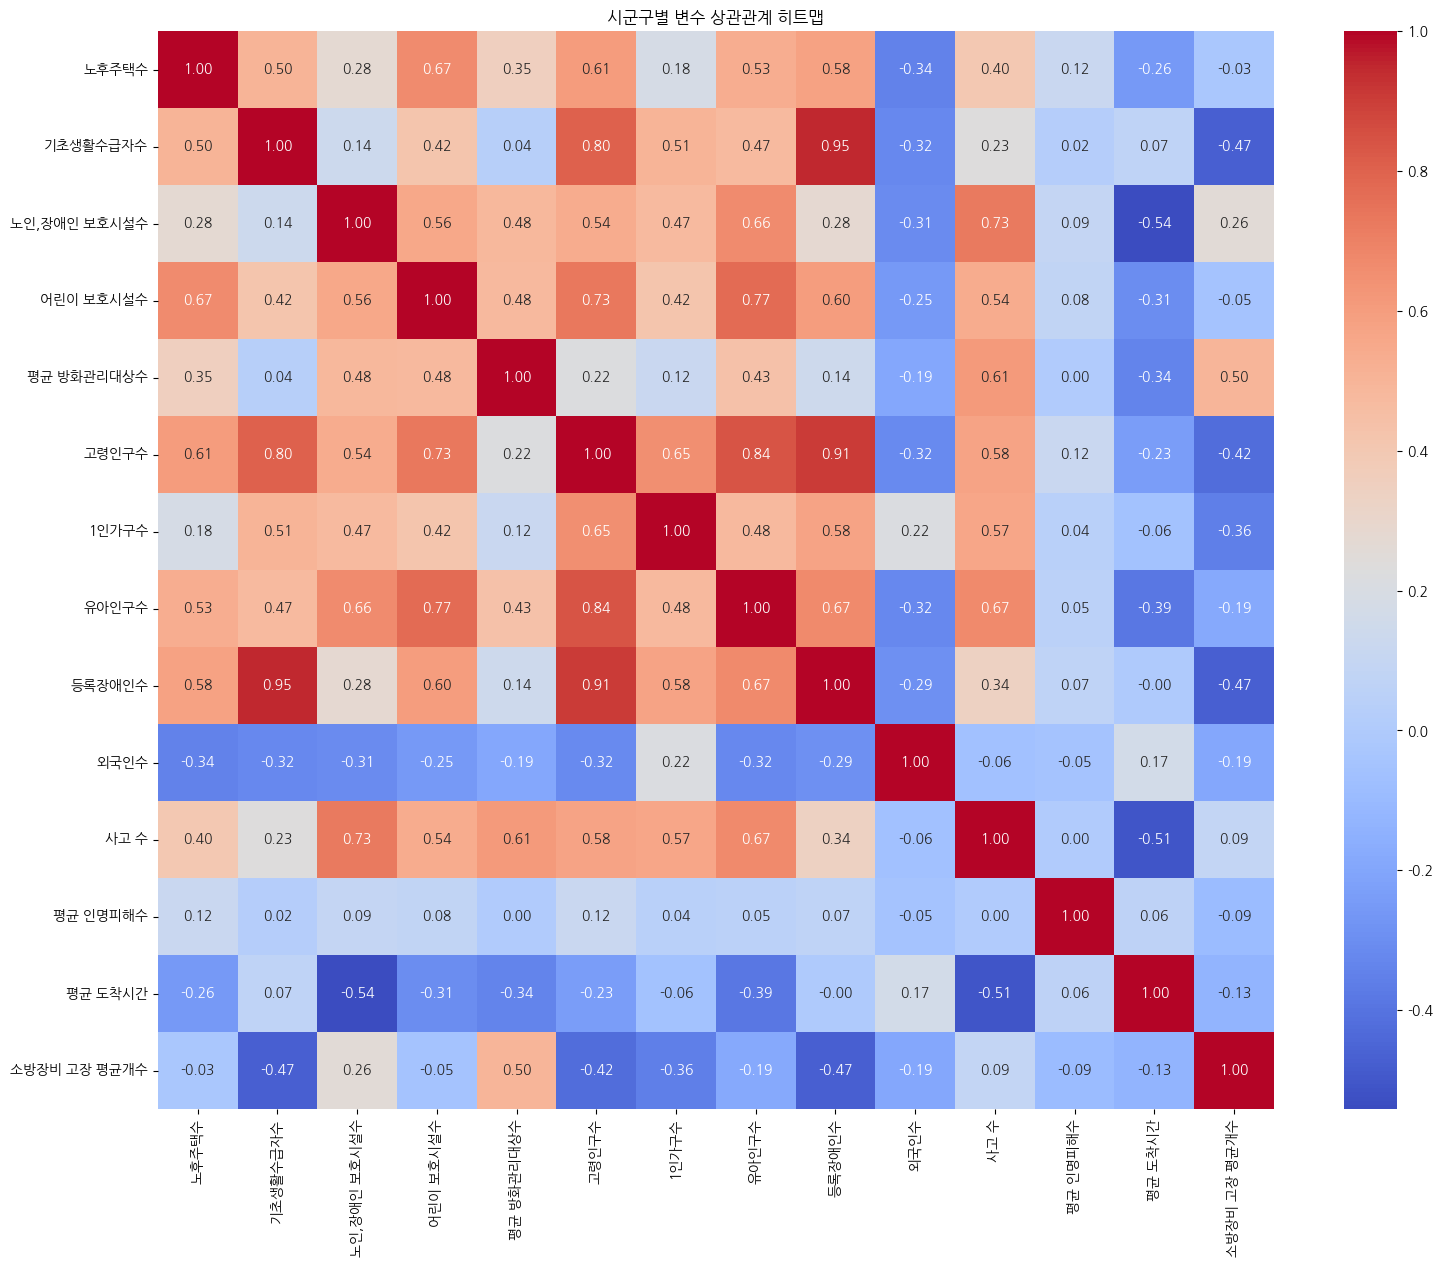

In [62]:
import seaborn as sns

plt.figure(figsize=(18, 14))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('시군구별 변수 상관관계 히트맵')
plt.show()

In [63]:
# 실제 df에 있는 수치형 변수명들만 넣으세요!
features = [
    '노후주택수',
    '기초생활수급자수',
    '노인,장애인 보호시설수',
    '어린이 보호시설수',
    '평균 방화관리대상수',
    '고령인구수',
    '등록장애인수',
    '유아인구수',
    '1인가구수',
    '평균 도착시간',
    '소방장비 고장 평균개수'
]

# 수치형 컬럼만 추출해서 상관계수 행렬 구하기
num_df = df.select_dtypes(include='number')
corr = num_df.corr()

# features에 있는 변수들만 추출 (사고 수와의 상관계수)
correlations = corr['사고 수'][features].abs()
weights = correlations / correlations.sum()
weights


,사고 수
노후주택수,0.075861
기초생활수급자수,0.044232
"노인,장애인 보호시설수",0.138224
어린이 보호시설수,0.102113
평균 방화관리대상수,0.116322
고령인구수,0.109703
등록장애인수,0.064921
유아인구수,0.127684
1인가구수,0.107466
평균 도착시간,0.097150


In [64]:
from sklearn.preprocessing import MinMaxScaler

# 1. 사용할 변수명 리스트
features = [
    '노후주택수',
    '기초생활수급자수',
    '노인,장애인 보호시설수',
    '어린이 보호시설수',
    '평균 방화관리대상수',
    '고령인구수',
    '등록장애인수',
    '유아인구수',
    '1인가구수',
    '평균 도착시간',
    '소방장비 고장 평균개수'
]

# 2. MinMaxScaler로 표준화
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df[features]), columns=features)

# 3. 가중치 딕셔너리
weights = {
    '노후주택수':           0.075861,
    '기초생활수급자수':      0.044232,
    '노인,장애인 보호시설수': 0.138224,
    '어린이 보호시설수':     0.102113,
    '평균 방화관리대상수':    0.116322,
    '고령인구수':           0.109703,
    '등록장애인수':          0.064921,
    '유아인구수':           0.127684,
    '1인가구수':           0.107466,
    '평균 도착시간':         0.097150,
    '소방장비 고장 평균개수': 0.016324
}

# 4. 점수 계산 (가중평균)
df_scaled['화재취약_우선도점수'] = sum(df_scaled[f] * w for f, w in weights.items())

# 5. 지역명과 함께 결과 합치고 정렬
df_result = pd.concat([df[['시군구명']], df_scaled['화재취약_우선도점수']], axis=1)\
            .sort_values('화재취약_우선도점수', ascending=False)

print(df_result)


    시군구명  화재취약_우선도점수
2    송파구    0.730946
6    강서구    0.710328
0    노원구    0.667816
1    강남구    0.620887
9    관악구    0.556393
11   은평구    0.527940
12   강동구    0.485660
14   성북구    0.469327
3    양천구    0.448874
10   서초구    0.444464
5   영등포구    0.441180
18  동대문구    0.423664
16   동작구    0.377409
13   마포구    0.362288
19   중랑구    0.350817
4    도봉구    0.322165
20   광진구    0.313475
22   성동구    0.288105
8    구로구    0.277582
21   금천구    0.274619
7    강북구    0.274477
17  서대문구    0.268530
23   종로구    0.227125
24    중구    0.205481
15   용산구    0.205297


In [89]:
weak=pd.read_csv('drive/MyDrive/data/서울시_재난안전취약자정보.csv', encoding='utf-8')
weak=weak.drop('시도명', axis=1).drop('소방서명', axis=1)
# 예시로 7개 모두 DataFrame이고 '시군구명'이 공통 컬럼이라면
df_list = [weak, old_bldg, old_safe_counts, child_safe_counts, gu_avg_all, water_broken, special_bldg_counts, fire_counts_mean]

from functools import reduce
weak = reduce(lambda left, right: pd.merge(left, right, on='시군구명', how='left'), df_list)

weak.head()

,시군구명,119안전센터개수,소방공무원수,센터담당인구수,소방공무원담당인구수,관할구역주민등록인구수,독거노인가구수,고령인구수,1인가구수,유아인구수,...,인구밀도,소방장비차량수,화재발생건수,노후주택수,"노인,장애인 보호시설수",어린이 보호시설수,평균 도착시간,소방장비 고장 평균개수,평균 방화관리대상수,평균 인명피해수
0,강남구,6,361,89872,1494,539231,10335,74959,68999,21750,...,13651,53,387,52886,19.0,93,5.16,86.0,278.33,14.33
1,강동구,5,296,91994,1554,459970,10831,69903,50316,23039,...,18706,45,221,23141,12.0,84,5.67,49.0,173.67,18.00
2,강북구,4,229,77014,1345,308055,12704,63313,45685,9967,...,13053,36,186,28719,2.0,35,5.63,19.0,135.33,10.00
3,강서구,6,315,96698,1842,580185,16294,88733,86172,26031,...,14001,46,212,28798,14.0,88,6.45,40.0,274.00,9.33
4,관악구,4,276,123765,1794,495060,13676,78430,129233,14828,...,16742,40,219,26870,16.0,69,5.77,23.0,166.00,14.67


In [90]:
weak[features] = weak[features].fillna(weak[features].mean())
weak.head()

,시군구명,119안전센터개수,소방공무원수,센터담당인구수,소방공무원담당인구수,관할구역주민등록인구수,독거노인가구수,고령인구수,1인가구수,유아인구수,...,인구밀도,소방장비차량수,화재발생건수,노후주택수,"노인,장애인 보호시설수",어린이 보호시설수,평균 도착시간,소방장비 고장 평균개수,평균 방화관리대상수,평균 인명피해수
0,강남구,6,361,89872,1494,539231,10335,74959,68999,21750,...,13651,53,387,52886,19.0,93,5.16,86.0,278.33,14.33
1,강동구,5,296,91994,1554,459970,10831,69903,50316,23039,...,18706,45,221,23141,12.0,84,5.67,49.0,173.67,18.00
2,강북구,4,229,77014,1345,308055,12704,63313,45685,9967,...,13053,36,186,28719,2.0,35,5.63,19.0,135.33,10.00
3,강서구,6,315,96698,1842,580185,16294,88733,86172,26031,...,14001,46,212,28798,14.0,88,6.45,40.0,274.00,9.33
4,관악구,4,276,123765,1794,495060,13676,78430,129233,14828,...,16742,40,219,26870,16.0,69,5.77,23.0,166.00,14.67


In [91]:
# 수치형 데이터만 선택 (object, 문자열 등 제외)
num_cols = weak.select_dtypes(include=['number'])

# 상관계수 행렬 계산
corr_matrix = num_cols.corr()

# 상관계수 행렬 출력 (전체)
corr_matrix

,119안전센터개수,소방공무원수,센터담당인구수,소방공무원담당인구수,관할구역주민등록인구수,독거노인가구수,고령인구수,1인가구수,유아인구수,등록외국인수,...,인구밀도,소방장비차량수,화재발생건수,노후주택수,"노인,장애인 보호시설수",어린이 보호시설수,평균 도착시간,소방장비 고장 평균개수,평균 방화관리대상수,평균 인명피해수
119안전센터개수,1.000000,0.884123,-0.246705,-0.083812,0.250905,-0.074764,0.085121,-0.019558,0.373378,-0.213863,...,-0.276992,0.843175,0.569925,0.251950,0.490639,0.305420,-0.331681,0.649077,0.738799,-0.002777
소방공무원수,0.884123,1.000000,0.108779,0.197984,0.462079,0.089072,0.293468,0.266501,0.504086,-0.322677,...,-0.070116,0.961081,0.783589,0.312396,0.651363,0.468447,-0.362309,0.574529,0.776280,0.108611
센터담당인구수,-0.246705,0.108779,1.000000,0.964385,0.776266,0.714716,0.809552,0.663661,0.621280,-0.358569,...,0.603612,0.101045,0.203609,0.412133,0.363667,0.602969,0.016938,-0.473438,0.037219,0.111987
소방공무원담당인구수,-0.083812,0.197984,0.964385,1.000000,0.868954,0.780050,0.891983,0.612826,0.757699,-0.419093,...,0.599512,0.184267,0.211653,0.531906,0.417474,0.693225,0.002926,-0.439795,0.123836,0.105422
관할구역주민등록인구수,0.250905,0.462079,0.776266,0.868954,1.000000,0.751283,0.947776,0.664735,0.939132,-0.303128,...,0.361101,0.386998,0.437110,0.618910,0.669758,0.792991,-0.160330,-0.280056,0.364236,0.058608
독거노인가구수,-0.074764,0.089072,0.714716,0.780050,0.751283,1.000000,0.892634,0.580339,0.585933,-0.277604,...,0.331679,0.060714,0.011351,0.607965,0.218502,0.566701,0.212018,-0.486324,0.085905,0.105124
고령인구수,0.085121,0.293468,0.809552,0.891983,0.947776,0.892634,1.000000,0.652125,0.842304,-0.316910,...,0.367502,0.247610,0.272861,0.605209,0.542009,0.734278,-0.066312,-0.423409,0.222640,0.114772
1인가구수,-0.019558,0.266501,0.663661,0.612826,0.664735,0.580339,0.652125,1.000000,0.481429,0.132285,...,0.278059,0.167547,0.295364,0.184878,0.473493,0.418464,0.022960,-0.355997,0.120376,0.028926
유아인구수,0.373378,0.504086,0.621280,0.757699,0.939132,0.585933,0.842304,0.481429,1.000000,-0.262666,...,0.321090,0.417328,0.449126,0.530988,0.665269,0.772431,-0.240221,-0.185819,0.435116,0.047323
등록외국인수,-0.213863,-0.322677,-0.358569,-0.419093,-0.303128,-0.277604,-0.316910,0.132285,-0.262666,1.000000,...,-0.207031,-0.425555,-0.249167,-0.313746,-0.277129,-0.295536,0.167041,-0.247851,-0.140230,0.045841


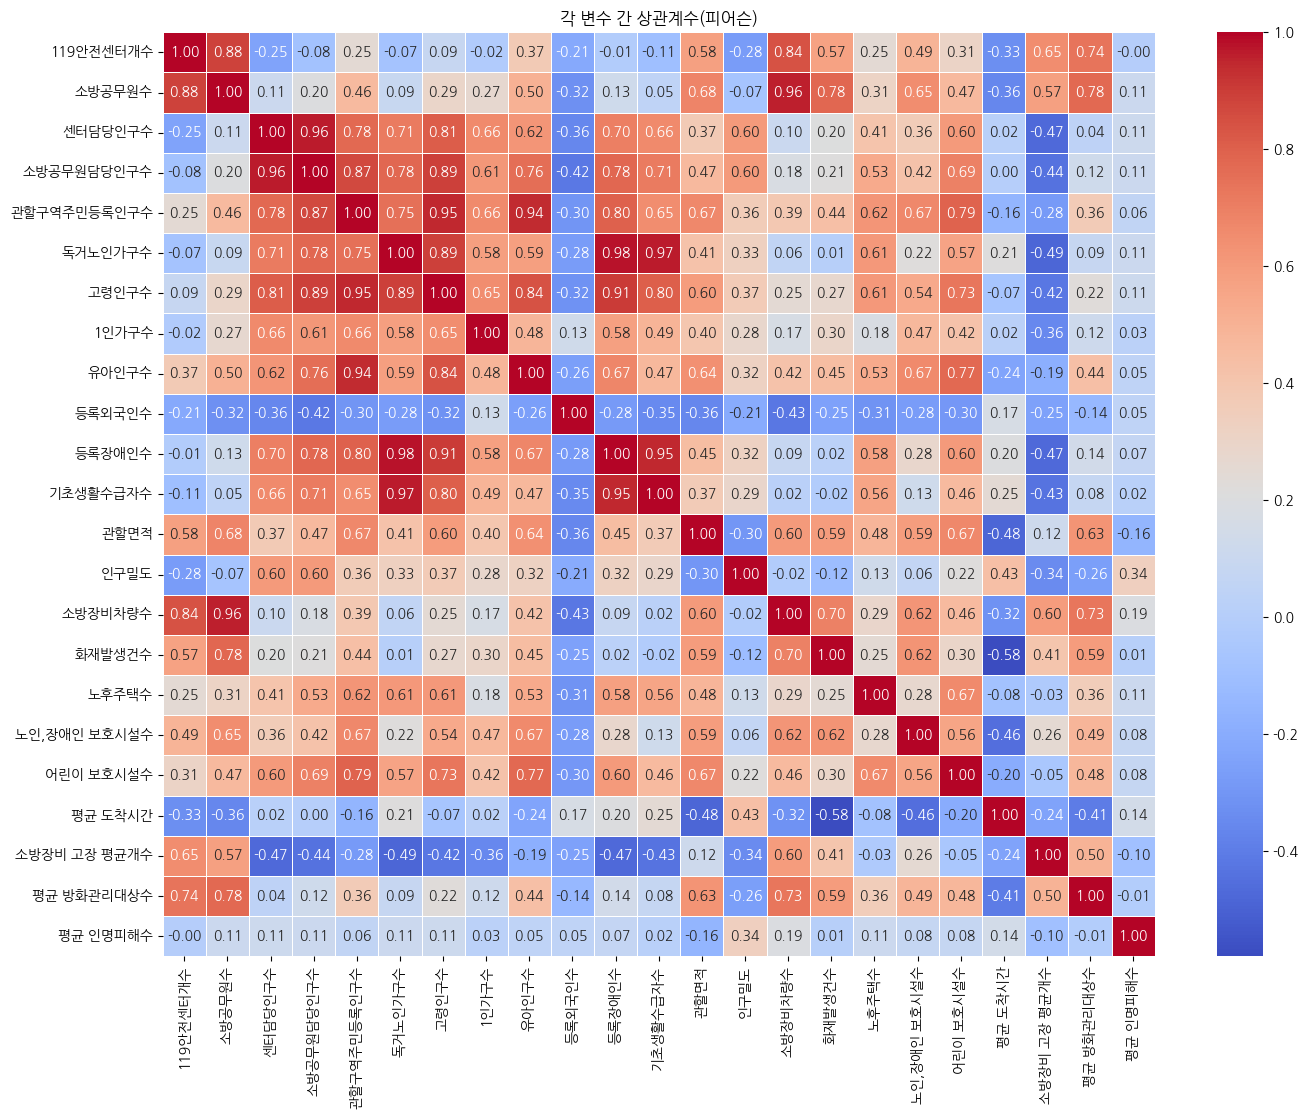

In [92]:
# 상관계수 히트맵 시각화 (옵션)
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title("각 변수 간 상관계수(피어슨)")
plt.show()

In [93]:
# 실제 df에 있는 수치형 변수명들만 넣으세요!
features = [
  '119안전센터개수',
  '소방공무원수',
  '관할구역주민등록인구수',
  '유아인구수',
  '관할면적',
  '소방장비차량수',
  '노인,장애인 보호시설수',
  '소방장비 고장 평균개수',
  '평균 방화관리대상수'
]

# 수치형 컬럼만 추출해서 상관계수 행렬 구하기
num_weak = weak.select_dtypes(include='number')
corr = num_weak.corr()

# features에 있는 변수들만 추출 (사고 수와의 상관계수)
correlations = corr['화재발생건수'][features].abs()
weights = correlations / correlations.sum()
print(weights)

119안전센터개수       0.110592
소방공무원수          0.152052
관할구역주민등록인구수     0.084819
유아인구수           0.087151
관할면적            0.115300
소방장비차량수         0.135009
노인,장애인 보호시설수    0.121068
소방장비 고장 평균개수    0.078846
평균 방화관리대상수      0.115161
Name: 화재발생건수, dtype: float64


In [94]:
from sklearn.preprocessing import MinMaxScaler

# 1. 사용할 변수명 리스트
features = [
  '119안전센터개수',
  '소방공무원수',
  '관할구역주민등록인구수',
  '유아인구수',
  '관할면적',
  '소방장비차량수',
  '노인,장애인 보호시설수',
  '소방장비 고장 평균개수',
  '평균 방화관리대상수'
]

# 2. MinMaxScaler로 표준화
scaler = MinMaxScaler()
weak_scaled = pd.DataFrame(scaler.fit_transform(weak[features]), columns=features)

# 3. 가중치 딕셔너리
weights = {
  '119안전센터개수':0.110592,
  '소방공무원수':0.152052,
  '관할구역주민등록인구수':0.084819,
  '유아인구수':0.087151,
  '관할면적':0.115300,
  '소방장비차량수':0.135009,
  '노인,장애인 보호시설수':0.121068,
  '소방장비 고장 평균개수':0.078846,
  '평균 방화관리대상수':0.115161
}

# 4. 점수 계산 (가중평균)
weak_scaled['화재취약지역_우선도점수'] = sum(weak_scaled[f] * w for f, w in weights.items())

# 5. 지역명과 함께 결과 합치고 정렬
weak_result = pd.concat([weak[['시군구명']], weak_scaled['화재취약지역_우선도점수']], axis=1)\
            .sort_values('화재취약지역_우선도점수', ascending=False)

print(weak_result)


    시군구명  화재취약지역_우선도점수
0    강남구      0.854005
17   송파구      0.835331
3    강서구      0.741703
14   서초구      0.696930
12   마포구      0.529527
8    노원구      0.528548
1    강동구      0.525364
22   종로구      0.524263
19  영등포구      0.469910
4    관악구      0.437194
21   은평구      0.421420
18   양천구      0.418274
24    중구      0.414224
10  동대문구      0.377073
16   성북구      0.353853
20   용산구      0.318459
11   동작구      0.271324
9    도봉구      0.267728
15   성동구      0.263873
13  서대문구      0.248430
23   중랑구      0.242863
2    강북구      0.213884
6    구로구      0.158187
5    광진구      0.152356
7    금천구      0.150644


In [95]:
import pandas as pd

# 예시 데이터 (실제 데이터프레임 변수명에 맞게 수정)
df1 = df_result  # 첫 번째 데이터프레임 (화재취약_우선도점수)
df2 = weak_result  # 두 번째 데이터프레임 (화재취약지역_우선도점수)

# 시군구명 기준으로 merge
merged = pd.merge(df1, df2, on='시군구명', how='inner')
print(merged.columns)

# 상관계수 계산
corr = merged['화재취약_우선도점수'].corr(merged['화재취약지역_우선도점수'])
print(f"피어슨 상관계수: {corr:.3f}")

Index(['시군구명', '화재취약_우선도점수', '화재취약지역_우선도점수'], dtype='object')
피어슨 상관계수: 0.738


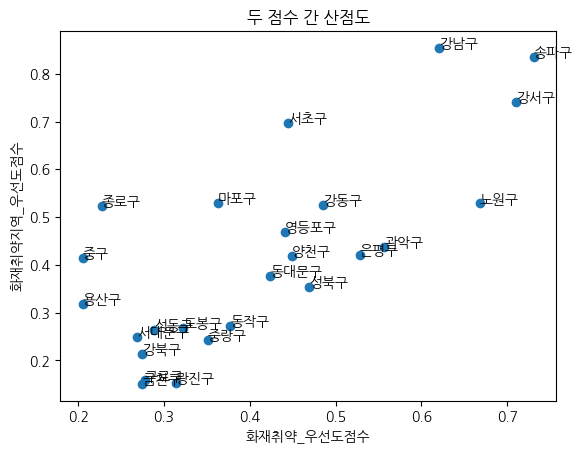

In [96]:
import matplotlib.pyplot as plt

plt.scatter(merged['화재취약_우선도점수'], merged['화재취약지역_우선도점수'])
plt.xlabel('화재취약_우선도점수')
plt.ylabel('화재취약지역_우선도점수')
plt.title('두 점수 간 산점도')
for i, txt in enumerate(merged['시군구명']):
    plt.annotate(txt, (merged['화재취약_우선도점수'][i], merged['화재취약지역_우선도점수'][i]))
plt.show()